# 线性回归

In [1]:
import torch as t
from matplotlib import pyplot as plt
from IPython import display

In [2]:
t.manual_seed(1000)

In [22]:
def get_fake_data(batch_size=8):
    x=t.rand(batch_size,1)*20
    y=x*2+(1+t.randn(batch_size,1))*3
    return x,y

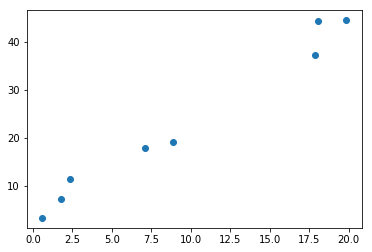

In [23]:
x,y=get_fake_data()
plt.scatter(x.squeeze().numpy(),y.squeeze().numpy())

In [24]:
w=t.rand(1,1)
b=t.zeros(1,1)
w,b

(
  0.6660
 [torch.FloatTensor of size 1x1], 
  0
 [torch.FloatTensor of size 1x1])

In [25]:
lr=0.001

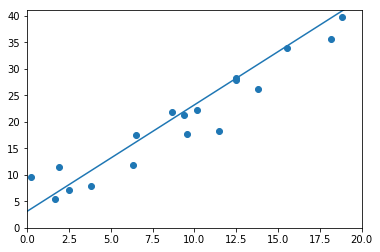

2.0083751678466797 3.0900111198425293
2.195256233215332 3.1024985313415527
1.7265034914016724 3.0704615116119385
1.8002249002456665 3.072118043899536
2.2576818466186523 3.111124038696289
1.5786559581756592 3.0699117183685303
2.144951343536377 3.1092212200164795
1.946480631828308 3.0864596366882324
2.1468350887298584 3.096419334411621
2.02947998046875 3.0893757343292236
1.913997769355774 3.080704927444458
2.0529298782348633 3.090043783187866
1.8451857566833496 3.07730770111084
2.076023578643799 3.0891239643096924
1.7798265218734741 3.0664243698120117
1.8800392150878906 3.074831485748291
1.8985443115234375 3.0829904079437256
2.261428117752075 3.106964349746704
1.9762380123138428 3.0796353816986084
2.158198356628418 3.0867373943328857
2.0390868186950684 3.080206871032715
1.9085030555725098 3.0687413215637207
2.0590944290161133 3.0822927951812744
1.900923252105713 3.0614209175109863
1.9129289388656616 3.062269687652588
2.080190658569336 3.0745229721069336
1.951957106590271 3.05931329727172

2.0751466751098633 3.0466387271881104
1.774314284324646 3.0213024616241455
1.9799755811691284 3.039804220199585
1.9432320594787598 3.034451961517334
2.309098958969116 3.0512588024139404
1.9757851362228394 3.026108503341675
2.009227991104126 3.027578592300415
1.9781959056854248 3.017076015472412
2.0595173835754395 3.021867036819458
2.0305609703063965 3.018807888031006
2.056455612182617 3.019697666168213
2.0570831298828125 3.01753830909729
2.025116205215454 3.0107994079589844
1.9085230827331543 3.001082420349121
2.048994302749634 3.0164527893066406
1.8751415014266968 2.9976446628570557
1.948732852935791 3.001136302947998
1.8667781352996826 2.9946374893188477
1.9766948223114014 3.002185106277466
2.032329559326172 3.004458427429199
2.009675979614258 3.001666307449341
1.9730998277664185 3.000488758087158
1.9924389123916626 2.997579336166382
2.0326037406921387 3.0009641647338867
2.151240110397339 3.011857271194458
2.106189250946045 3.0075151920318604
1.8287572860717773 2.9907374382019043
1.8

2.01367449760437 2.9147090911865234
1.8741815090179443 2.90959095954895
2.038926839828491 2.9166436195373535
2.0279541015625 2.924976110458374
2.078155040740967 2.9305503368377686
2.197897434234619 2.937199592590332
1.9900574684143066 2.92812442779541
1.9921951293945312 2.9268949031829834
2.0784900188446045 2.931715250015259
2.1693294048309326 2.936490297317505
1.8284865617752075 2.9170234203338623
2.111097574234009 2.9404990673065186
1.9776719808578491 2.9266769886016846
1.9760936498641968 2.9213778972625732
1.9660120010375977 2.9165186882019043
2.077286958694458 2.922334909439087
2.1201162338256836 2.931119918823242
1.9148967266082764 2.9168050289154053
2.268702983856201 2.942678689956665
2.0556554794311523 2.9236974716186523
1.9606881141662598 2.918458938598633
1.8456883430480957 2.9059300422668457
1.9661165475845337 2.9072625637054443
2.019636631011963 2.91255259513855
1.9026262760162354 2.902273416519165
1.9738881587982178 2.9071528911590576
1.956581950187683 2.901771306991577
1.9

In [27]:
for i in range(200000):
    x,y=get_fake_data()
    # forward
    y_pred=x.mm(w)+b.expand_as(y)
    loss=0.5*(y_pred-y)**2
    loss=loss.sum()
    
    # backward
    dloss=1
    dy_pred=dloss*(y_pred-y)
    
    dw=x.t().mm(dy_pred)
    db=dy_pred.sum()
    
    w.sub_(lr*dw)
    b.sub_(lr*db)
    
    if i%1000==0:
        display.clear_output(wait=True)
        x=t.arange(0,20).view(-1,1)
        y=x.mm(w)+b.expand_as(x)
        plt.plot(x.numpy(),y.numpy())
        
        x2,y2=get_fake_data(batch_size=20)
        plt.scatter(x2.numpy(),y2.numpy())
        
        plt.xlim(0,20)
        plt.ylim(0,41)
        plt.show()
        plt.pause(0.5)
    print(w.squeeze()[0],b.squeeze()[0])